<a href="https://colab.research.google.com/github/HarshaV05/rand.stuff.imp/blob/master/TimeSeries_AnalyticsVidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from pandas import Series 
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [0]:
train = pd.read_csv('drive/My Drive/TS_AV/Train_SU63ISt.csv')
test = pd.read_csv('drive/My Drive/TS_AV/Test_0qrQsBZ.csv')

In [0]:
train_original = train.copy()
test_original = test.copy()

In [0]:
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [0]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [0]:
train['Datetime'] = pd.to_datetime(train['Datetime'], format= '%d-%m-%Y %H:%M')

In [0]:
test['Datetime'] = pd.to_datetime(test['Datetime'], format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original['Datetime'], format= '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original['Datetime'], format = '%d-%m-%Y %H:%M')

In [0]:
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [0]:
train_original.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [0]:
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [0]:
for i in (train, test, train_original, test_original):
  i['Hour'] = i['Datetime'].dt.hour 
  i['Day'] = i['Datetime'].dt.day
  i['Month'] = i['Datetime'].dt.month 
  i['Year'] = i['Datetime'].dt.year 

In [0]:
train.tail()

,ID,Datetime,Count,Hour,Day,Month,Year
18283,18283,2014-09-25 19:00:00,868,19,25,9,2014
18284,18284,2014-09-25 20:00:00,732,20,25,9,2014
18285,18285,2014-09-25 21:00:00,702,21,25,9,2014
18286,18286,2014-09-25 22:00:00,580,22,25,9,2014
18287,18287,2014-09-25 23:00:00,534,23,25,9,2014


In [0]:
train['Day of week'] = train['Datetime'].dt.dayofweek

In [0]:
train.head()

,ID,Datetime,Count,Hour,Day,Month,Year,Day of week
0,0,2012-08-25 00:00:00,8,0,25,8,2012,5
1,1,2012-08-25 01:00:00,2,1,25,8,2012,5
2,2,2012-08-25 02:00:00,6,2,25,8,2012,5
3,3,2012-08-25 03:00:00,2,3,25,8,2012,5
4,4,2012-08-25 04:00:00,2,4,25,8,2012,5


In [0]:
def applyer(row):
  if row.dayofweek == 5 or row.dayofweek == 6 :
    return 1
  else:
    return 0

In [0]:
train['Weekend'] = train['Datetime'].apply(applyer)

In [0]:
train.head()

,ID,Datetime,Count,Hour,Day,Month,Year,Day of week,Weekend
0,0,2012-08-25 00:00:00,8,0,25,8,2012,5,1
1,1,2012-08-25 01:00:00,2,1,25,8,2012,5,1
2,2,2012-08-25 02:00:00,6,2,25,8,2012,5,1
3,3,2012-08-25 03:00:00,2,3,25,8,2012,5,1
4,4,2012-08-25 04:00:00,2,4,25,8,2012,5,1


In [0]:
train.set_index('Datetime', inplace = True)

In [0]:
train.head()

,ID,Count,Hour,Day,Month,Year,Day of week,Weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,0,8,0,25,8,2012,5,1
2012-08-25 01:00:00,1,2,1,25,8,2012,5,1
2012-08-25 02:00:00,2,6,2,25,8,2012,5,1
2012-08-25 03:00:00,3,2,3,25,8,2012,5,1
2012-08-25 04:00:00,4,2,4,25,8,2012,5,1


In [0]:
train.drop(['ID'], axis=1, inplace = True)

In [0]:
train.head()

,Count,Hour,Day,Month,Year,Day of week,Weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,0,25,8,2012,5,1
2012-08-25 01:00:00,2,1,25,8,2012,5,1
2012-08-25 02:00:00,6,2,25,8,2012,5,1
2012-08-25 03:00:00,2,3,25,8,2012,5,1
2012-08-25 04:00:00,2,4,25,8,2012,5,1


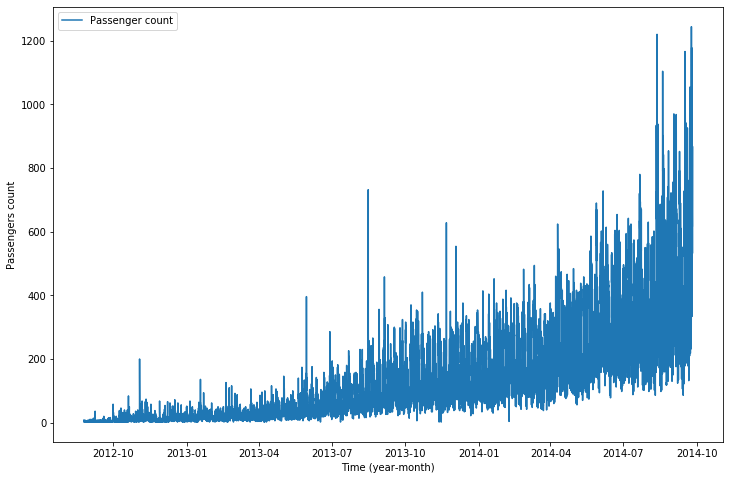

In [0]:
plt.figure(figsize = (12,8))
plt.plot(train['Count'], label = 'Passenger count')
plt.xlabel("Time (year-month)")
plt.ylabel('Passengers count')
plt.legend(loc = 'best')